# Install

In [ ]:
# Update new package. Lastest version is 0.1.18
!pip install parrotai -U

In [16]:
#Import library
import requests
from io import BytesIO
from PIL import Image
from parrotai import ParrotAPI
import time

# Login

In [17]:
# Create a new instance of the ParrotAPI
parrotai = ParrotAPI()

In [18]:
# Please visit https://joinparrot.ai to register your account

username = '<your-username>'
password = '<your-password>'

In [19]:
# Login to the API. The credentials are stored in the object. You to login first before you can access the other endpoints
_ = parrotai.login(username=username, password=password)

# List Model

In [20]:
# Get models
models = parrotai.get_models("image_generation")
print(models)

{'data': [{'model': 'sd-1.5', 'metadata': {'source': 'https://huggingface.co/runwayml/stable-diffusion-v1-5'}}, {'model': 'sdxl-turbo', 'metadata': {'source': 'https://huggingface.co/stabilityai/sdxl-turbo'}}, {'model': 'sdxl-lightning', 'metadata': {'source': 'https://huggingface.co/ByteDance/SDXL-Lightning'}}], 'errors': [], 'error_description': '', 'start_time': '2024-03-26 00:31:18.532036', 'end_time': '2024-03-26 00:31:18.537386', 'host_of_client_call_request': '103.186.100.36', 'total_time_by_second': 0.005361, 'status': 'success'}


# Generate Image

In [21]:
# Create task
resp = parrotai.create_txt2img(
    "refreshing, vibrant glowing strawberry, floating in the water,  dew drops, pink lighting, glitters in the water, refreshing  , in the style of a product hero shot in motion, dynamic magazine ad image, photorealism, flowing water background, sunshine, sparkling in the water",
    model="sdxl-lightning",
    lora='',
    width=1024,
    height=1024,
    steps=8,
    seed=1000,
    negative_prompt= "",
    enhance_prompt=False
)
print(resp)
task_id = resp['data']['task_id'] # ID to get result
task_id

{'data': {'task_id': '6c8549e065ab4323b3542103c0e736df', 'prompt': 'refreshing, vibrant glowing strawberry, floating in the water,  dew drops, pink lighting, glitters in the water, refreshing  , in the style of a product hero shot in motion, dynamic magazine ad image, photorealism, flowing water background, sunshine, sparkling in the water', 'negative_prompt': '', 'config': {'model': 'sdxl-lightning', 'lora': '', 'height': 1024, 'ưidth': 1024, 'steps': 8, 'negative_prompt': '', 'seed': 1000, 'enhance_prompt': False, 'task_name': 'tasks.parrot_sdxl_lightning_task', 'task_type': 'SDXL_LIGHTNING', 'queue_name': 'sdxl_lightning_queue'}}, 'errors': [], 'error_description': '', 'start_time': '2024-03-26 00:31:18.612023', 'end_time': '2024-03-26 00:31:18.715626', 'host_of_client_call_request': '103.186.100.36', 'total_time_by_second': 0.103616, 'status': 'success'}


'6c8549e065ab4323b3542103c0e736df'

In [22]:
# Function to retrieve the result
def get_result(task_id):
    timeout = time.time() + 600                        # Maximum wait time is 10 minutes (600 seconds)

    while time.time() < timeout:
        resp_result = parrotai.result_txt2img(task_id) # Get result from the task
        status = resp_result['data']['data']['status']
        if status == 'COMPLETED':
            return resp_result                         # Return the result if received
        time.sleep(1)                                  # Wait for 1 second before checking again

    return "Timeout reached. No result."               # Return timeout message if no result after 10 minutes


# Function to view the image
def view_image_from_url(url: str) -> Image:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image

In [23]:
# Get result
resp_result = get_result(task_id)
print(resp_result)

{'data': {'is_success': True, 'data': {'task_id': '6c8549e065ab4323b3542103c0e736df', 'total_tasks': 1, 'percent': 100, 'status': 'COMPLETED', 'url_download': 'https://media.joinparrot.ai/parrot-prod/generated_result/6c8549e065ab4323b3542103c0e736df.png'}}, 'errors': [], 'error_description': '', 'start_time': '2024-03-26 00:31:27.348284', 'end_time': '2024-03-26 00:31:27.353569', 'host_of_client_call_request': '103.186.100.36', 'total_time_by_second': 0.005296, 'status': 'success'}


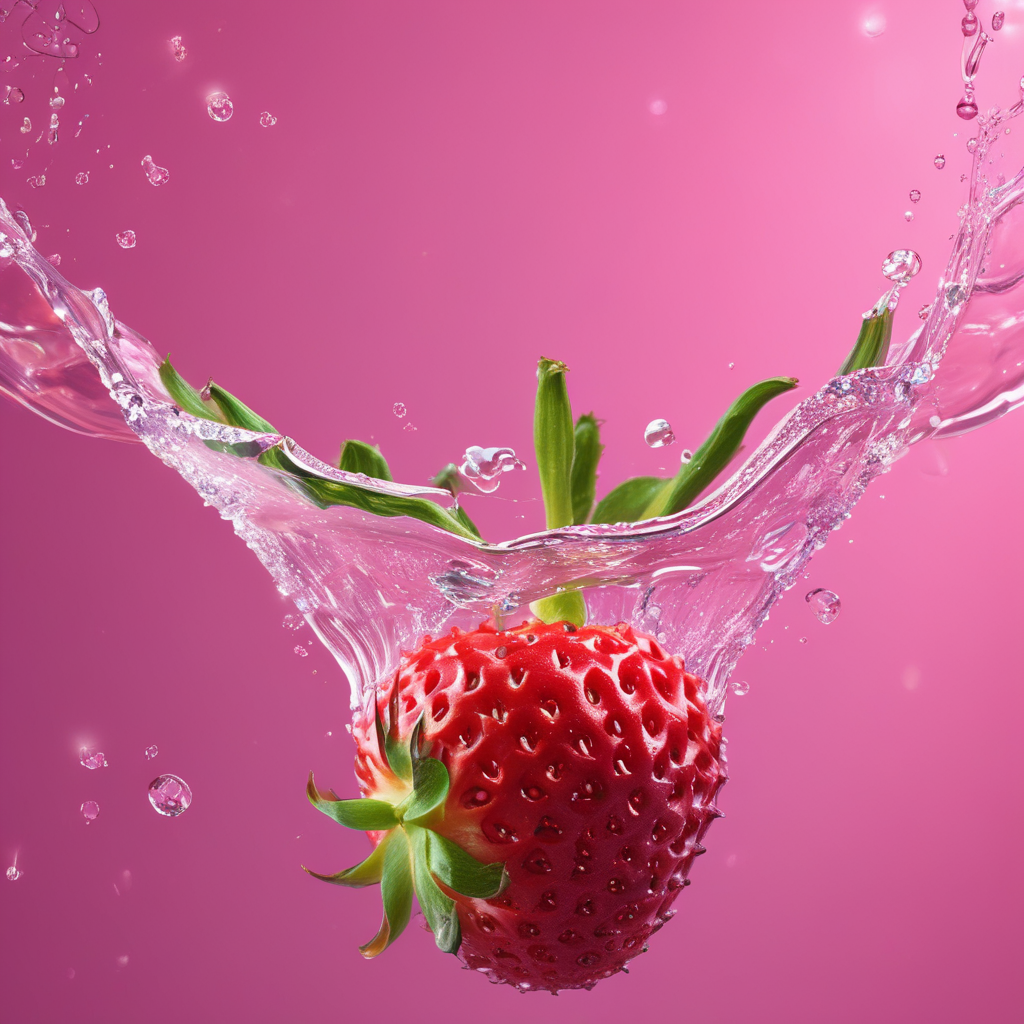

In [24]:
# View image
image_url = resp_result['data']['data']['url_download'] # Get image url
view_image_from_url(image_url)                          # Display image

In [25]:
# Download image
print(image_url)

https://media.joinparrot.ai/parrot-prod/generated_result/6c8549e065ab4323b3542103c0e736df.png
